# **Logistic Regression Algorithm Logic**

## **1. Initialization**
* **Weights and Bias**: Initialize the weight vector  (matching the number of features) and a scalar bias , usually to zeros or small random numbers.
* **Hyperparameters**: Define the **Learning Rate** $(\alpha)$ and the number of **Epochs** (iterations) for the training process.
## **2. The Forward Pass (Probabilistic Modeling)**
For each input feature vector :
* **Linear Combination**: Calculate the linear sum: $$ z = w^\top x + b $$
* **Sigmoid Activation**:  
  Pass $( z )$ through the **sigmoid function** to squash the output between 0 and 1:  
   $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

This output represents the probability $ ( \hat{y} ) $ that the input belongs to the positive class.

## **3. The Loss Function (Cost Calculation)**
* **Binary Cross-Entropy**: Measure the error between the predicted probability $ ( \hat{y} ) $ and the actual label $ ( y ) $ using the Log Loss formula:
$$
  J(w, b) = -\frac{1}{m} \sum_{i=1}^{m}
  \left[
    y^{(i)} \log(\hat{y}^{(i)}) +
    (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})
  \right]
  $$

## **4. Optimization (Gradient Descent)**
Update the parameters to minimize the loss:
* **Compute Gradients**: Calculate the partial derivatives of the loss with respect to  and .
* **Update Parameters**: Move the weights in the opposite direction of the gradient:
$$
w = w - \alpha \cdot dw
$$
$$
b = b - \alpha \cdot db
$$

## **5. Prediction and Evaluation**
* **Thresholding**: Convert the probabilistic output into a binary class. If $ \hat{y} >= 0.5 $ , predict class 1; otherwise, predict class 0.
* **Performance Metrics**: Evaluate the model using accuracy, precision, or a confusion matrix.
* **Failure Analysis**: Identify samples where the linear decision boundary fails to separate the classes.



In [73]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [74]:
class LogisticRegression:
    def __init__(self, learning_rate: float = 0.01, epochs: int = 1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _sigmoid(self, z):
        # Sigmoid function and appropriate loss formulation 
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialization 
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        # Logistic Regression with gradient descent 
        for _ in range(self.epochs):
            # Forward Pass
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # Compute Loss
            epsilon = 1e-15 # to avoid log(0)
            loss = -1/m * np.sum(y * np.log(y_predicted + epsilon) + (1 - y) * np.log(1 - y_predicted + epsilon))
            self.loss_history.append(loss)

            # Compute Gradients
            dw = (1 / m) * np.dot(X.T, (y_predicted - y))
            db = (1 / m) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            # Print loss every 100 epochs
            if _ % 100 == 0:
                print(f"Epoch {_}: Loss {loss}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        # Threshold at 0.5 for binary classification
        return [1 if i > 0.5 else 0 for i in y_predicted]

In [75]:
# Load the CSV
df = pd.read_csv('./logistic_regression/data/data.csv') 

# 1. Drop any completely empty columns (trailing commas)
df = df.dropna(axis=1, how='all')

# 2. Drop the ID column (usually the first column)
df = df.drop(df.columns[0], axis=1) 

# 3. Encode Labels: Convert 'M' to 1 and 'B' to 0
# The Diagnosis column is now at index 0 after dropping ID
diagnosis_col = df.columns[0]
df[diagnosis_col] = df[diagnosis_col].map({'M': 1, 'B': 0})

# 4. Separate Target (y) and Features (X)
# y is the Diagnosis (0 or 1)
# X is all the numeric features that follow
y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

# 5. Manual Scaling (Only now that everything is numeric)
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
std[std == 0] = 1.0 # Prevent division by zero

X = (X - mean) / (std + 1e-15)

# 6. Dataset 80/20 split
split_ratio = 0.8
indices = np.arange(len(X))
np.random.shuffle(indices)
split_idx = int(len(X) * split_ratio)

X_train, X_test = X[indices[:split_idx]], X[indices[split_idx:]]
y_train, y_test = y[indices[:split_idx]], y[indices[split_idx:]]

In [76]:
# Initialize model
learning_rate = 0.1
epochs = 2000
model = LogisticRegression(learning_rate=learning_rate, epochs=epochs)

# Train using gradient descent logic
model.fit(X_train, y_train)

# Predict probabilities and convert to classes
y_pred = model.predict(X_test)

Epoch 0: Loss 0.6931471805599435
Epoch 100: Loss 0.09799548572361039
Epoch 200: Loss 0.08030553738866034
Epoch 300: Loss 0.07262202228846538
Epoch 400: Loss 0.06801451268205205
Epoch 500: Loss 0.06482022264630276
Epoch 600: Loss 0.06241678359427351
Epoch 700: Loss 0.060511769312367424
Epoch 800: Loss 0.058946691837524275
Epoch 900: Loss 0.05762675399584303
Epoch 1000: Loss 0.0564910246626462
Epoch 1100: Loss 0.05549814753381815
Epoch 1200: Loss 0.054618836528624023
Epoch 1300: Loss 0.05383164089955495
Epoch 1400: Loss 0.053120412522234144
Epoch 1500: Loss 0.05247271702490726
Epoch 1600: Loss 0.051878796436313095
Epoch 1700: Loss 0.05133086868554392
Epoch 1800: Loss 0.05082264076607445
Epoch 1900: Loss 0.05034896191509835


In [77]:
# Convert lists/arrays to integer numpy arrays for reliable comparison
y_true = np.array(y_test).astype(int)
y_p = np.array(y_pred).astype(int)

# 1. Component calculation
tp = np.sum((y_true == 1) & (y_p == 1)) # True Malignant correctly identified
tn = np.sum((y_true == 0) & (y_p == 0)) # True Benign correctly identified
fp = np.sum((y_true == 0) & (y_p == 1)) # Benign mistaken for Malignant
fn = np.sum((y_true == 1) & (y_p == 0)) # Malignant missed

# 2. Metric calculation
accuracy = (tp + tn) / len(y_true)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

print(f"--- Final Evaluation ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")

--- Final Evaluation ---
Accuracy:  0.9649
Precision: 1.0000
Recall:    0.9111


In [78]:
# 1. Initialize PCA to reduce from 30 features to 2
pca = PCA(n_components=2)

# 2. Fit PCA on training data and transform both sets
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 3. Initialize and train your custom LogisticRegression on 2D data
# We use a 2D version specifically for visualization purposes
vis_model = LogisticRegression(learning_rate=learning_rate, epochs=epochs)
vis_model.fit(X_train_pca, y_train)

# 4. Create a meshgrid to cover the plot area
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 5. Predict for every point in the meshgrid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(vis_model.predict(grid_points))
Z = Z.reshape(xx.shape)

# 6. Plotting the results


Epoch 0: Loss 0.6931471805599435
Epoch 100: Loss 0.13328422868634504
Epoch 200: Loss 0.12246100478826197
Epoch 300: Loss 0.11902490287408814
Epoch 400: Loss 0.11748861122956163
Epoch 500: Loss 0.11668650574542472
Epoch 600: Loss 0.11622919905508032
Epoch 700: Loss 0.11595349828592877
Epoch 800: Loss 0.11578085074303343
Epoch 900: Loss 0.11566976909004363
Epoch 1000: Loss 0.11559685583784413
Epoch 1100: Loss 0.11554826516677891
Epoch 1200: Loss 0.115515501423109
Epoch 1300: Loss 0.11549320468722368
Epoch 1400: Loss 0.11547791909821856
Epoch 1500: Loss 0.11546737780183763
Epoch 1600: Loss 0.11546007325612546
Epoch 1700: Loss 0.11545499167893641
Epoch 1800: Loss 0.11545144512976498
Epoch 1900: Loss 0.11544896330646416


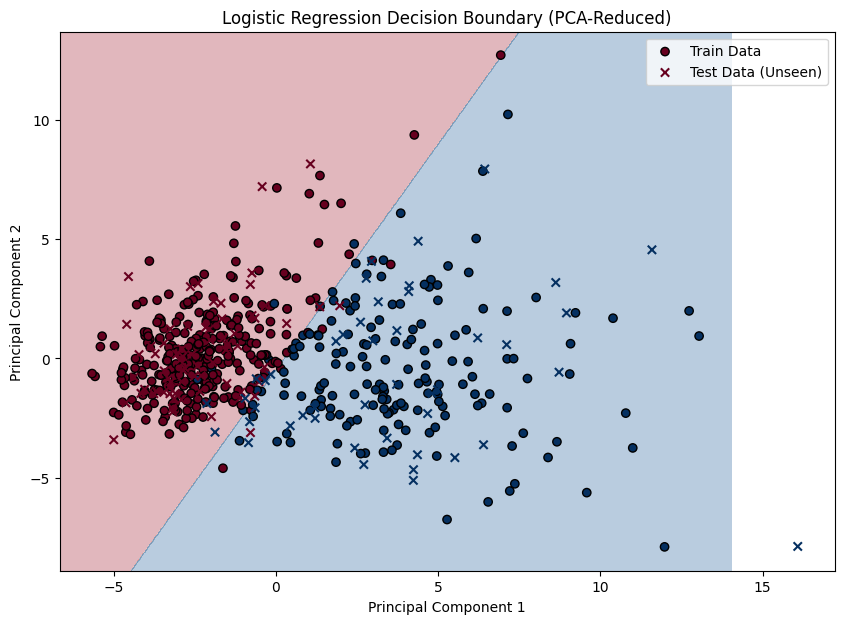

In [80]:
plt.figure(figsize=(10, 7))
# Plot decision region (generated from Training data)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu') # Red/Blue regions
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap='RdBu', label='Train Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker='x', cmap='RdBu', label='Test Data (Unseen)')

plt.title("Logistic Regression Decision Boundary (PCA-Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()